## Predict 3rd place play-off & Final World Cup 2022 Match

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf

In [2]:
data = "dataset/"
df_internationalmatches = pd.read_csv(data + "Results International Matches.csv")
df_wcmatches = pd.read_csv(data + "Data Predict.csv")

print(df_internationalmatches.shape)
print(df_wcmatches.shape)

(615, 19)
(2, 17)


In [3]:
df_internationalmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_score,away_score,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2018-09-06,Germany,France,84,82,85,85,85,82,0,0,15,1,1561.0,1726.0,UEFA Nations League,Munich,Germany,False
1,2018-09-06,Wales,Republic of Ireland,82,75,71,74,77,75,4,1,19,29,1536.0,1484.0,UEFA Nations League,Cardiff,Wales,False
2,2018-09-06,Slovenia,Bulgaria,72,70,76,69,72,67,1,2,55,47,1392.0,1416.0,UEFA Nations League,Ljubljana,Slovenia,False
3,2018-09-06,Austria,Sweden,80,76,77,75,75,75,2,0,23,13,1502.0,1565.0,Friendly,Vienna,Austria,False
4,2018-09-06,Netherlands,Peru,79,80,80,77,80,75,2,1,17,20,1540.0,1535.0,Friendly,Amsterdam,Netherlands,False


In [4]:
df_wcmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2022-12-17,Croatia,Morocco,83,76,82,74,78,78,12,22,1645.64,1563.50,FIFA World Cup,Al Rayyan,Qatar,True
1,2022-12-18,Argentina,France,85,86,83,84,83,83,3,4,1773.88,1759.78,FIFA World Cup,Lusail,Qatar,True


In [5]:
label = LabelEncoder()
ohc = OneHotEncoder()

In [6]:
ftr = []
for i in range(len(df_internationalmatches)):
    if df_internationalmatches.home_score[i] > df_internationalmatches.away_score[i]:
        ftr.append(0)
    elif df_internationalmatches.home_score[i] < df_internationalmatches.away_score[i]:
        ftr.append(2)
    else:
        ftr.append(1)
df_internationalmatches.neutral = label.fit_transform(df_internationalmatches.neutral)
df_internationalmatches['FTR'] = ftr

In [7]:
columns = ['FTR', 'home_score', 'away_score', 'home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']

df_internationalmatches = df_internationalmatches[columns]
df_internationalmatches.head()

,FTR,home_score,away_score,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,neutral
0,1,0,0,84,82,85,85,85,82,15,1,1561.0,1726.0,0
1,0,4,1,82,75,71,74,77,75,19,29,1536.0,1484.0,0
2,2,1,2,72,70,76,69,72,67,55,47,1392.0,1416.0,0
3,0,2,0,80,76,77,75,75,75,23,13,1502.0,1565.0,0
4,0,2,1,79,80,80,77,80,75,17,20,1540.0,1535.0,0


In [8]:
y_train_predict = ohc.fit_transform(df_internationalmatches['FTR'].to_numpy().reshape(-1,1)).toarray()
X_train = df_internationalmatches.iloc[:,3:].astype(float)

In [9]:
df_wcmatches.neutral = label.fit_transform(df_wcmatches.neutral)
X_test = df_wcmatches[['home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']].astype(float)

In [10]:
def plot_graph_accuracy(history, accuracy):
    plt.plot(history.history[accuracy])
    plt.xlabel("Epochs")
    plt.ylabel(accuracy)
    plt.show()
    
def plot_graph_loss(history, loss):
    plt.plot(history.history[loss])
    plt.xlabel("Epochs")
    plt.ylabel(loss)
    plt.show()

### Model predict matches in 90 - 120 minutes (Probability Home win, Draw, Away Win)

In [11]:
model = tf.keras.models.Sequential([
    # The model is still a secret until all World Cup matches are finished
    
    
    
    
    
    
])

In [12]:
model.compile(# Still secret
              
              
              )

history = model.fit(X_train, y_train_predict, batch_size=10, epochs=500)

Epoch 1/500
62/62 [==============================] - 5s 4ms/step - loss: 26.4053 - accuracy: 0.4114
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 17.3363 - accuracy: 0.3984
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 10.3301 - accuracy: 0.4081
Epoch 4/500
62/62 [==============================] - 0s 2ms/step - loss: 6.3166 - accuracy: 0.3935
Epoch 5/500
62/62 [==============================] - 0s 3ms/step - loss: 8.6580 - accuracy: 0.4130
Epoch 6/500
62/62 [==============================] - 0s 3ms/step - loss: 9.2709 - accuracy: 0.4081
Epoch 7/500
62/62 [==============================] - 0s 3ms/step - loss: 6.4772 - accuracy: 0.4228
Epoch 8/500
62/62 [==============================] - 0s 2ms/step - loss: 7.0623 - accuracy: 0.4081
Epoch 9/500
62/62 [==============================] - 0s 3ms/step - loss: 10.1951 - accuracy: 0.4163
Epoch 10/500
62/62 [==============================] - 0s 2ms/step - loss: 5.5362 - accuracy: 0.4033
Epoch

62/62 [==============================] - 0s 2ms/step - loss: 1.6522 - accuracy: 0.4976
Epoch 164/500
62/62 [==============================] - 0s 2ms/step - loss: 1.6328 - accuracy: 0.4976
Epoch 165/500
62/62 [==============================] - 0s 2ms/step - loss: 1.6231 - accuracy: 0.5138
Epoch 166/500
62/62 [==============================] - 0s 2ms/step - loss: 1.6628 - accuracy: 0.4764
Epoch 167/500
62/62 [==============================] - 0s 2ms/step - loss: 1.6591 - accuracy: 0.4911
Epoch 168/500
62/62 [==============================] - 0s 2ms/step - loss: 1.6063 - accuracy: 0.4927
Epoch 169/500
62/62 [==============================] - 0s 2ms/step - loss: 1.5984 - accuracy: 0.4959
Epoch 170/500
62/62 [==============================] - 0s 2ms/step - loss: 1.5823 - accuracy: 0.5203
Epoch 171/500
62/62 [==============================] - 0s 3ms/step - loss: 1.5725 - accuracy: 0.5138
Epoch 172/500
62/62 [==============================] - 0s 3ms/step - loss: 1.5489 - accuracy: 0.5220
Epoc

62/62 [==============================] - 0s 3ms/step - loss: 1.0136 - accuracy: 0.5073
Epoch 326/500
62/62 [==============================] - 0s 3ms/step - loss: 1.0058 - accuracy: 0.5252
Epoch 327/500
62/62 [==============================] - 0s 3ms/step - loss: 1.0038 - accuracy: 0.5252
Epoch 328/500
62/62 [==============================] - 0s 3ms/step - loss: 1.0079 - accuracy: 0.5268
Epoch 329/500
62/62 [==============================] - 0s 3ms/step - loss: 1.0047 - accuracy: 0.5333
Epoch 330/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0064 - accuracy: 0.5333
Epoch 331/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0034 - accuracy: 0.5382
Epoch 332/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0051 - accuracy: 0.5268
Epoch 333/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9963 - accuracy: 0.5398
Epoch 334/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0096 - accuracy: 0.5268
Epoc

62/62 [==============================] - 0s 2ms/step - loss: 1.0001 - accuracy: 0.5317
Epoch 488/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9994 - accuracy: 0.5285
Epoch 489/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0002 - accuracy: 0.5301
Epoch 490/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0016 - accuracy: 0.5317
Epoch 491/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0005 - accuracy: 0.5252
Epoch 492/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9986 - accuracy: 0.5203
Epoch 493/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0017 - accuracy: 0.5252
Epoch 494/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9994 - accuracy: 0.5252
Epoch 495/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9986 - accuracy: 0.5366
Epoch 496/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0060 - accuracy: 0.5236
Epoc

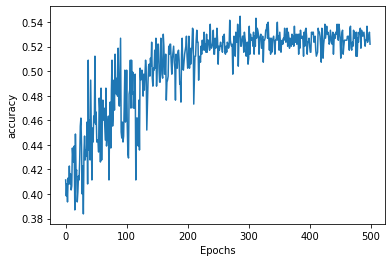

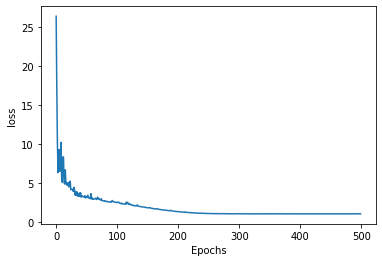

In [13]:
plot_graph_accuracy(history, 'accuracy')
plot_graph_loss(history, 'loss')

In [14]:
prob = model.predict(X_test)
print('Probability Result Semi-finals World Cup 2022 Match in 90 - 120 Minutes')
print('=======================================================================')
for i in range(len(df_wcmatches)):
    print(f'{df_wcmatches.home_team[i]} vs {df_wcmatches.away_team[i]}')
    print(f'Home Win: {prob[i][0]:.5f}  Draw: {prob[i][1]:.5f}  Away Win: {prob[i][2]:.5f}\n')

Probability Result Semi-finals World Cup 2022 Match in 90 - 120 Minutes
Croatia vs Morocco
Home Win: 0.51399  Draw: 0.27956  Away Win: 0.20645

Argentina vs France
Home Win: 0.40666  Draw: 0.30366  Away Win: 0.28968

